In [1]:
import matplotlib.pyplot as plt
import pandas as pd
df_lg = pd.read_csv(r'C:\Users\romai\Documents\GitHub\carculator_truck\dev\Class5_Tractor_ENG_400_Long_Haul+ES_1Hz_full.vmod',
                 sep=",", header=1)
df_reg = pd.read_csv(r'C:\Users\romai\Documents\GitHub\carculator_truck\dev\Class5_Tractor_ENG_400_Regional_Delivery_1Hz_full.vmod',
                 sep=",", header=1)
df_urb = pd.read_csv(r'C:\Users\romai\Documents\GitHub\carculator_truck\dev\Class5_Tractor_ENG_400_Urban_Delivery_1Hz_full.vmod',
                 sep=",", header=1)


In [22]:
df_lg.loc[:, ["time [s]", "v_act [km/h]"]].to_excel("400_lg.xlsx")

In [23]:
df_reg.loc[:, ["time [s]", "v_act [km/h]"]].to_excel("400_reg.xlsx")

In [24]:
df_urb.loc[:, ["time [s]", "v_act [km/h]"]].to_excel("400_urb.xlsx")

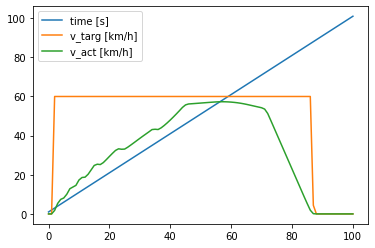

In [28]:
df_lg.loc[0:100, ["time [s]", "v_targ [km/h]","v_act [km/h]"]].plot()

In [ ]:
# 40t, lg, empty
8300
# 40t, lg, full
13700

# 40t, urb, empty
12000
# 40t, urb, full
22440

# 18t, lg, full
8571
# 18t, lg, empty
6938
# 18t, urb, full
11830
# 18t, urb, empty
8144

# 7.5t, lg, full
4780
# 7.5t, lg, empty
4166
# 7.5t, urb, full
6107
# 7.5t, urb, empty
4772

# 3.5, lg, full

# 3.5t, lg, empty


In [52]:
total_fc_lg = (df_lg.loc[:, "FC-Final [g/h]"]/3600/1000).sum()*42400 # kj/cycle
distance_lg = (df_lg.loc[:,"v_act [km/h]"] * 1000 /3600).sum()/1000 #m/s
total_fc_lg/distance_lg

4166.091396657156

In [53]:
total_fc_reg = (df_reg.loc[:, "FC-Final [g/h]"]/3600/1000).sum()*42400 # kj/cycle
distance_reg = (df_reg.loc[:,"v_act [km/h]"] * 1000 /3600).sum()/1000 #m/s
total_fc_reg/distance_reg

4189.114787884509

In [54]:
total_fc_urb = (df_urb.loc[:, "FC-Final [g/h]"]/3600/1000).sum()*42400 # kj/cycle
distance_urb = (df_urb.loc[:,"v_act [km/h]"] * 1000 /3600).sum()/1000 #m/s
total_fc_urb/distance_urb

4772.469451544178

In [28]:
(8300+12000)/2

10150.0

In [33]:
(13700+22440)/2

18070.0

In [34]:
(10150+18070)/2

14110.0

In [116]:
from carculator_truck import *

In [181]:
tip = TruckInputParameters() 
tip.static()
_, array = fill_xarray_from_input_parameters(tip)

array.loc[dict(parameter="capacity utilization", size=["40t"])] = .76
#array.loc[dict(parameter="capacity utilization", size=["18t"])] = .64
#array.loc[dict(parameter="capacity utilization", size=["7.5t"])] = .9
#array.loc[dict(parameter="capacity utilization", size=["7.5t"])] = .83

#array.loc[dict(parameter="capacity utilization")] = 0

tm = TruckModel(array, cycle="Long haul")

tm.set_all()
(tm.array.sel(year=2020, powertrain="ICEV-d", parameter="TtW energy")/42400*100).to_dataframe("val")

Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.64 | 0.73 | 0.83 | 0.76 | 0.73 | 0.83 |
|   BEV, 2010    | 0.64 | 0.73 | 0.83 | 0.76 | 0.73 | 0.83 |
|   BEV, 2020    | 0.64 | 0.73 | 0.83 | 0.76 | 0.73 | 0.83 |
|   BEV, 2030    | 0.64 | 0.73 | 0.83 | 0.76 | 0.73 | 0.83 |
|   BEV, 2040    | 0.64 | 0.73 | 0.83 | 0.76 | 0.73 | 0.83 |
|   BEV, 2050    | 0.64 | 0.73 | 0.83 | 0.76 | 0.73 | 0.83 |
|   FCEV, 2000   | 0.64 | 0.73 | 0.83 | 0.76 | 0.73 | 0.83 |
|   FCEV, 2010   | 0.64 | 0.73 | 0.83 | 0.76 | 0.73 | 0.83 |
|   FCEV, 2020   | 0.64 | 0.73 | 0.83 | 0.76 | 0.73 | 0.83 |
|   FCEV, 2030   | 0.64 | 0.73 | 0.83 | 0.76 | 0.73 | 0.83 |
|   FCEV, 2040   | 0.64 | 0.73 | 0.83 | 0.

,,powertrain,parameter,year,val
size,value,,,,
18t,0,ICEV-d,TtW energy,2020,18.877166
26t,0,ICEV-d,TtW energy,2020,23.499137
3.5t,0,ICEV-d,TtW energy,2020,8.049294
40t,0,ICEV-d,TtW energy,2020,29.517074
60t,0,ICEV-d,TtW energy,2020,37.714281
7.5t,0,ICEV-d,TtW energy,2020,11.091047


In [158]:
(tm.array.sel(year=2020, powertrain="ICEV-d", parameter="TtW energy")/42400*100).to_dataframe("val")

,,powertrain,parameter,year,val
size,value,,,,
18t,0,ICEV-d,TtW energy,2020,20.507230
26t,0,ICEV-d,TtW energy,2020,25.642492
3.5t,0,ICEV-d,TtW energy,2020,8.167015
40t,0,ICEV-d,TtW energy,2020,32.557816
60t,0,ICEV-d,TtW energy,2020,43.950936
7.5t,0,ICEV-d,TtW energy,2020,11.561888


In [144]:
ic = InventoryCalculation(tm.array, fuel_blend=tm.fuel_blend, country=tm.country)

In [145]:
res = ic.calculate_impacts()

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in CN using NMC chemistry.
 * in 2000, % of renewable: 55.0%, GHG intensity per kWh: 452 g. CO2-eq.
 	 * in 2010, % of renewable: 55.0%, GHG intensity per kWh: 376 g. CO2-eq.
 	 * in 2020, % of renewable: 55.0%, GHG intensity per kWh: 319 g. CO2-eq.
 	 * in 2030, % of renewable: 55.0%, GHG intensity per kWh: 275 g. CO2-eq.
 	 * in 2040, % of renewable: 55.0%, GHG intensity per kWh: 235 g. CO2-eq.
 	 * in 2050, % of renewable: 55.0%, GHG intensity per kWh: 211 g. CO2-eq.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 1.0%
 	 * in 2020 _________________________________________ 2.0%
 	 * in 2030 _________________________________________ 6.0%
 	 * in 2040 _________________________________________ 8.0%
 	 * in 2050 _________________________________

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Text(0, 0.5, 'kg CO2/tkm')

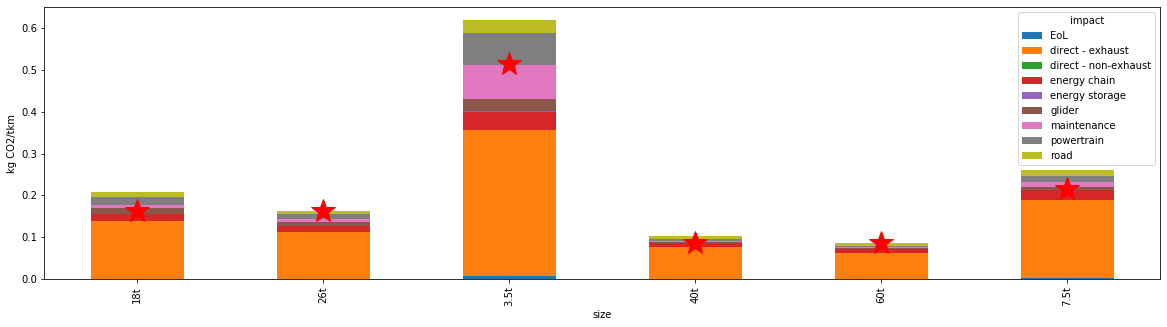

In [171]:
res.sel(impact_category="climate change", value=0, year=2020,powertrain="ICEV-d").to_dataframe("val").unstack()["val"].plot(kind="bar",
                                                                                             stacked=True, figsize=(20, 5))

plt.plot([0,1,2,3,4,5], [.163,.163,.513,.087,.087,.214,], marker="*", linewidth=0, markersize=25, c="red")
plt.ylabel("kg CO2/tkm")